# Prediction of Students Dropout and academic success

A Project by:<br>
Cristal Rivera <br> 
Anton Donle<br>|

## 1. Problem Definition and dataset selection

Clearly define the problem statement by explaining its context and relevance.
* Justify the choice of dataset and discuss its potential to address the problem.

In [144]:
## Import Required Dependencies
import numpy as np
import pandas as pd
from sklearn.svm import SVC

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [126]:
#Load Dataset, seperate on ;
data = pd.read_csv('data.csv', sep = ';')

In [127]:
#look at data
data[0:100]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,9,2,137.0,1,0,0,1,1,0,19,1,0,5,9,5,14.000000,0,0,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,9773,1,1,135.0,1,37,1,5,5,124.9,1,0,0,1,0,0,18,0,0,6,6,6,13.666667,0,0,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,9500,1,1,132.0,1,37,37,7,7,120.3,1,0,0,1,0,1,18,0,0,7,7,7,13.750000,0,0,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,9085,1,1,135.0,1,1,2,9,1,134.3,1,0,0,1,0,0,19,0,0,5,7,5,14.200000,2,0,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


## 2. Exploratory Data Analysis

### 2.1. General Feature analysis

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [129]:
#checking for missing values
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [130]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

### 2.2 Correlation between Columns

In [131]:
#create new data frame without Target variable
data_without_target = data.drop(['Target'], axis = 1) 
#Make a correlation matrix
corr = data_without_target.corr()
corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045

We can see that there is a very big correlation between credits in the first and second semester (graded, evaluated and approved). <br>
We should maybe combine them into one or two categories (credits 1. sem, credits 2. sem)<br>
There is a very large correlation between nationality and International which makes sense and we should probably remove one of them.<br>
There is a large correlation between age and marital status + application mode<br>

In [132]:
#create data for curricular columns
curricular_data = data_without_target.filter(like ="Curricular", axis=1)

#Make a correlation matrix
corr = curricular_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Curricular units 1st sem (credited),1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256
Curricular units 1st sem (enrolled),0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547
Curricular units 1st sem (evaluations),0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296
Curricular units 1st sem (approved),0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983
Curricular units 1st sem (grade),0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076
Curricular units 1st sem (without evaluations),0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261
Curricular units 2nd sem (credited),0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148
Curricular units 2nd sem (enrolled),0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697
Curricular units 2nd sem (evaluations),0.427845,0.599567,0.778863,0.539934,0.487236,0.144683,0.430978,0.604821,1.000000,0.463535,0.453394,0.144877
Curricular units 2nd sem (approved),0.490478,0.673341,0.442265,0.904002,0.673335,-0.013070,0.519081,0.703258,0.463535,1.000000,0.760804,-0.061567


In [133]:
##Create correlation table with values and not a plot
correlation_matrix = data_without_target.corr()
# Remove self-correlation (set diagonal values to NaN)
np.fill_diagonal(correlation_matrix.values, np.nan)
#treshold to filter the confusion matrix with the correlations that are higher to this value
threshold = 0.5
# Find correlated pairs (without taking absolute values)
high_corr_pairs = correlation_matrix.stack().reset_index() #transform to a DF
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
# Filter to keep both high positive and high negative correlations
filtered_corr = high_corr_pairs[
    (high_corr_pairs['Correlation'] > threshold) | (high_corr_pairs['Correlation'] < -threshold)
].sort_values(by="Correlation", ascending=False)

# Display the results
filtered_corr[::2]

,Feature_1,Feature_2,Correlation
966,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),0.944811
797,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942627
395,Father's occupation,Mother's occupation,0.910472
869,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
905,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
707,International,Nacionality,0.790935
833,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778863
756,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
793,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.769083
1115,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),0.760804


We saw there is a high correlation between the curricular columns. 

### 2.3. Further Variable Analysis


#### 2.3.1. Economic Variables

Based on this table we can see the variables that are correlated and that we can decide to either remove one of those or merge them like the curricular columns.

Interpreting Economic Indicators:

Unemployment Rate: Reflects the percentage of the labor force that is unemployed at the time of the student's enrollment. A higher unemployment rate might influence a student's decision to pursue higher education or affect their financial stability. Inflation Rate: Indicates the rate at which the general level of prices for goods and services is rising. High inflation can impact the cost of living and educational expenses. GDP (Gross Domestic Product): Represents the economic performance of the country. A higher GDP may correlate with better funding for educational institutions and more opportunities for students.#Review of the three external economic variables:



In [134]:
economic_var = data_without_target[['Unemployment rate','Inflation rate','GDP']]
economic_var

,Unemployment rate,Inflation rate,GDP
0,10.8,1.4,1.74
1,13.9,-0.3,0.79
2,10.8,1.4,1.74
3,9.4,-0.8,-3.12
4,13.9,-0.3,0.79
...,...,...,...
4419,15.5,2.8,-4.06
4420,11.1,0.6,2.02
4421,13.9,-0.3,0.79
4422,9.4,-0.8,-3.12


#### 2.3.2. Nationality and International

In [135]:
data.value_counts("International")

International
0    4314
1     110
Name: count, dtype: int64

In [136]:
data.value_counts("Nacionality")

Nacionality
1      4314
41       38
26       14
6        13
22       13
24        5
100       3
11        3
103       3
101       2
2         2
25        2
21        2
62        2
105       2
13        1
17        1
32        1
14        1
108       1
109       1
Name: count, dtype: int64

#### 2.3.3. Qualifications

In [137]:
data.value_counts("Mother's qualification")

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
35       3
30       3
10       3
11       3
29       3
36       3
14       2
18       1
26       1
22       1
27       1
44       1
Name: count, dtype: int64

In [138]:
data.value_counts("Father's qualification")

Father's qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
40       5
9        5
30       4
22       4
14       4
29       3
41       2
35       2
43       2
26       2
10       2
6        2
18       1
25       1
20       1
13       1
27       1
33       1
31       1
42       1
44       1
Name: count, dtype: int64

#### 2.3.4. Occupation

In [139]:
data.value_counts("Mother's occupation")

Mother's occupation
9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
192       5
175       5
10        4
134       4
193       4
132       3
151       3
143       3
122       2
153       2
152       2
125       1
131       1
173       1
171       1
Name: count, dtype: int64

### 2.4. Target Variable

In [140]:
#Check for class balance
n_graduate, n_dropout, n_enrolled = data.value_counts('Target')

In [141]:
n = n_graduate + n_dropout + n_enrolled
proportion_g = n_graduate/n
proportion_d = n_dropout/n
proportion_e = n_enrolled/n
print(proportion_g, proportion_d, proportion_e)

0.4993218806509946 0.3212025316455696 0.1794755877034358


We observe the following pattern of our target label: <br>
Graduate: 2209 (0.49) <br>
Dropout: 1421 (0.32)<br>
Enrolled: 794 (0.17)<br>
First number is occurence, second is frequency
There is a class imbalance.

C:\Users\crist\AppData\Local\Temp\ipykernel_14588\503346687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='rocket')


<Axes: xlabel='Target', ylabel='count'>

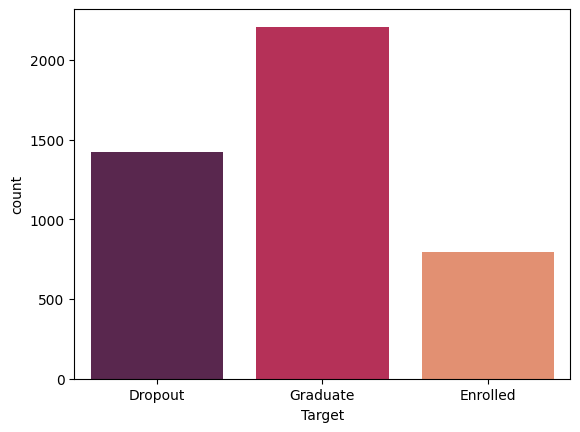

In [142]:
sns.set_palette("pastel")
#sns.histplot(data = data, x = "Target" )
sns.countplot(x='Target', data=data, palette='rocket')


array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>],
       [<Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>],
       [<Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>],
       [<Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
   

c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x00000118420DA5C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


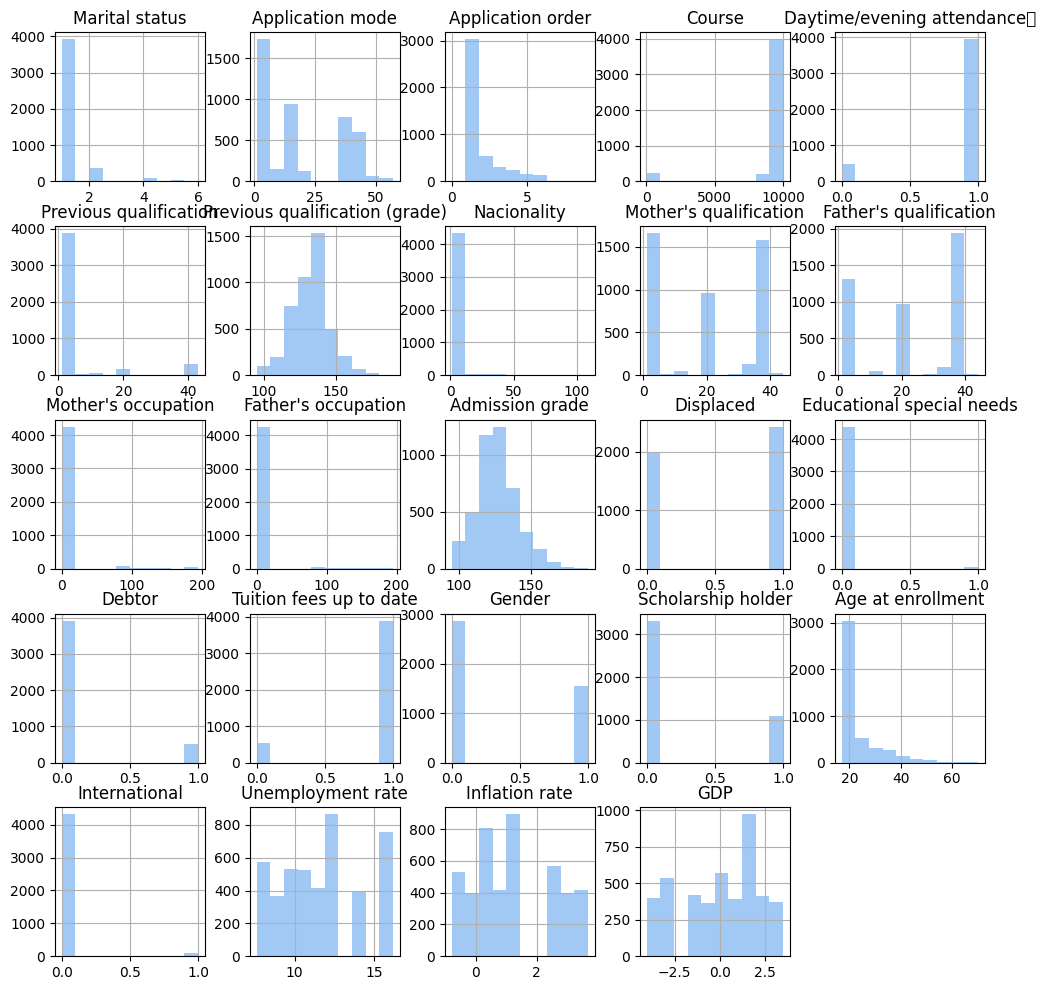

In [143]:
# Exclude columns that contain "Curricular" in their header
no_curricular_data = data_without_target.loc[:, ~data_without_target.columns.str.contains("Curricular", case=False)]


no_curricular_data.hist(figsize=(12,12))

### 2.5. Conclusion

1. Resolve Economic Situation (GPD, Inflation Rate, Unenmployment Rate)
2. Resolve International + Nationality
3. Maritial Status + Age of enrollment, Age of enrollment + application mode
4. Resolve Curricular units
5. Resolve Mothers + Fathers occupation
6. Replace numbers that encode something by string for what they encode
7. undo encoding

## 3. ML before Feature Engineering

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB


We decided to perform machine learning on our dataset before we do the feature engineering.
This is to have a baseline of how well the set of machine learning algorithms performs on the dataset without any preprocessing.
Doing this enables us to test how much, if at all, the algorithms improve after feature engineering.
We are testing a wide range of algorithms and for the ones that are most promising we will perform further hyper parameter testing later on.

The algorithms we picked are:
1. Support Vector Machine classifier
2. K Nearest Neighbours
3. Logistic Regression
4. Decission Trees
5. Naive Bayes Classifier

Those were picked because they are interpretable to some extent (maybe we need to add sources?) are widley used. They are also rather simple models, compared to something more complex like convlutional neural networks.

In the pipeline, first the target variable will be extracted from the dataframe as X (target) and y (feature space) is the dataframe without the target variable.
Functions will be defined that run a model and return the predictions. This means we can simply reuse those functions later on. 

KNN classifies each entity in correspondance to the mayority of its neighbours (k neighbours)
Support Vector Machine fits a classification line through the feature space ?
Decission trees defines a set of questions/instructions/property that are checked in a specific order
Naive Bayes Classifier makes use of Naives Bayes assumption to calculate a probability of an entity beloging to class X, given a set of features : P(Class| Features )
Logistic Regression - Have to look this up

In [ ]:
#We will drop people with target value == Enrolled
enrolled = data[data["Target"] == "Enrolled"].index
data.drop(enrolled,inplace=True)
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [ ]:
data_before_engineering = data

#Define X and y 
y = data_before_engineering["Target"]
X = data_before_engineering.drop(['Target'], axis = 1) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

### 3.1. SVM

In [ ]:
def train_and_predict_SVM(X_train, y_train, x_test):
    #Initilize a SVM
    clf = SVC(random_state=43)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return(y_pred)

In [ ]:
y_pred_svm = train_and_predict_SVM(X_train, y_train, X_test)
acc_svm_before = accuracy_score(y_test, y_pred_svm)
print(acc_svm_before)
confusion_matrix(y_test, y_pred_svm)

0.6497797356828194


array([[  0, 318],
       [  0, 590]])

### 3.2. KNN

In [ ]:
def train_and_predict_KNN(X_train, y_train, x_test, n):
    #Initilize a KNN
    knn = KNeighborsClassifier(n_neighbors=n)
    #Fit it to the training data
    knn.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = knn.predict(x_test)
    #Check Accuracy
    return(y_pred)

In [ ]:
n = 3
y_pred_knn= train_and_predict_KNN(X_train, y_train, X_test, n)
acc_knn_before = accuracy_score(y_test, y_pred_knn)
print(acc_knn_before)
confusion_matrix(y_test, y_pred_knn)

0.7533039647577092


array([[188, 130],
       [ 94, 496]])

### 3.3. Logistic Regression

In [ ]:
def train_and_predict_LR(X_train, y_train, x_test):
    #Initilize a LR
    clf = LogisticRegression(random_state=43,max_iter = 50)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred

In [ ]:
y_pred_lr = train_and_predict_LR(X_train, y_train, X_test)
acc_lr_before = accuracy_score(y_test, y_pred_lr)
print(acc_lr_before)
confusion_matrix(y_test, y_pred_lr)

0.8348017621145375


c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[207, 111],
       [ 39, 551]])

### 3.4. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def train_and_predict_DTC(X_train, y_train, x_test):

    #Initilize a DTC
    clf = DecisionTreeClassifier(random_state=43)
    #Fit it to the training data
    clf.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred

In [ ]:
y_pred_dt = train_and_predict_DTC(X_train, y_train, X_test)
acc_dt_before = accuracy_score(y_test, y_pred_dt)
print(acc_dt_before)
print(confusion_matrix(y_test, y_pred_dt))

0.8370044052863436
[[253  65]
 [ 83 507]]


### 3.5. Naive Bayes

In [ ]:
def train_and_predict_GNB(X_train, y_train, X_test):
    #Initilize a SVM
    gnb = GaussianNB()
    #Fit it to the training data
    gnb.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = gnb.predict(X_test)
    #Check Accuracy
    accuracy = accuracy_score(y_pred, y_test)
    return y_pred

In [ ]:
y_pred_gnb = train_and_predict_GNB(X_train, y_train, X_test)
acc_nb_before = accuracy_score(y_test, y_pred_gnb)
print(acc_nb_before)
print(confusion_matrix(y_test, y_pred_gnb))

0.8348017621145375
[[230  88]
 [ 62 528]]


## 4. Feature Engineering

In the exploratory data analysis we identified a set of instructions and changes we want to make to the dataset with the goal to make it more interpretable and make a machine learning model perform better. This was done by merging some features, and by removing features with high correlation with other features. 
(We didnt deide yet whether we unencode the encodings or one hot encoding). A summary of the extact actions taken is given further below. 


### 4.1. un-Encoding

In [ ]:

# # Replace numbers in the "Application mode" column with their corresponding encoded values
# data['Application mode'] = data['Application mode'].replace({
#     1: '1st phase - general contingent',
#     2: 'Ordinance No. 612/93',
#     5: '1st phase - special contingent (Azores Island)',
#     7: 'Holders of other higher courses',
#     10: 'Ordinance No. 854-B/99',
#     15: 'International student (bachelor)',
#     16: '1st phase - special contingent (Madeira Island)',
#     17: '2nd phase - general contingent',
#     18: '3rd phase - general contingent',
#     26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
#     27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
#     39: 'Over 23 years old',
#     42: 'Transfer',
#     43: 'Change of course',
#     44: 'Technological specialization diploma holders',
#     51: 'Change of institution/course',
#     53: 'Short cycle diploma holders',
#     57: 'Change of institution/course (International)'
# })

# # Replace numbers in the "Course" column with their corresponding encoded values
# data['Course'] = data['Course'].replace({
#     33: 'Biofuel Production Technologies',
#     171: 'Animation and Multimedia Design',
#     8014: 'Social Service (evening attendance)',
#     9003: 'Agronomy',
#     9070: 'Communication Design',
#     9085: 'Veterinary Nursing',
#     9119: 'Informatics Engineering',
#     9130: 'Equinculture',
#     9147: 'Management',
#     9238: 'Social Service',
#     9254: 'Tourism',
#     9500: 'Nursing',
#     9556: 'Oral Hygiene',
#     9670: 'Advertising and Marketing Management',
#     9773: 'Journalism and Communication',
#     9853: 'Basic Education',
#     9991: 'Management (evening attendance)'
# })

# data["Mother's qualification"] = data["Mother's qualification"].replace({
#     1: 'Secondary Education - 12th Year of Schooling or Eq.',
#     2: "Higher Education - Bachelor's Degree",
#     3: 'Higher Education - Degree',
#     4: "Higher Education - Master's",
#     5: 'Higher Education - Doctorate',
#     6: 'Frequency of Higher Education',
#     9: '12th Year of Schooling - Not Completed',
#     10: '11th Year of Schooling - Not Completed',
#     11: '7th Year (Old)',
#     12: 'Other - 11th Year of Schooling',
#     14: '10th Year of Schooling',
#     18: 'General commerce course',
#     19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
#     22: 'Technical-professional course',
#     26: '7th year of schooling',
#     27: '2nd cycle of the general high school course',
#     29: '9th Year of Schooling - Not Completed',
#     30: '8th year of schooling',
#     34: 'Unknown',
#     35: "Can't read or write",
#     36: 'Can read without having a 4th year of schooling',
#     37: 'Basic education 1st cycle (4th/5th year) or equiv.',
#     38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
#     39: 'Technological specialization course',
#     40: 'Higher education - degree (1st cycle)',
#     41: 'Specialized higher studies course',
#     42: 'Professional higher technical course',
#     43: 'Higher Education - Master (2nd cycle)',
#     44: 'Higher Education - Doctorate (3rd cycle)'
# })

# # Replace numbers in the "Displaced" column with their corresponding encoded values
# data['Displaced'] = data['Displaced'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "Educational special needs" column with their corresponding encoded values
# data['Educational special needs'] = data['Educational special needs'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "Debtor" column with their corresponding encoded values
# data['Debtor'] = data['Debtor'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "Tuition fees up to date" column with their corresponding encoded values
# data['Tuition fees up to date'] = data['Tuition fees up to date'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "Gender" column with their corresponding encoded values
# data['Gender'] = data['Gender'].replace({
#     0: 'female',
#     1: 'male'
# })

# # Replace numbers in the "Scholarship holder" column with their corresponding encoded values
# data['Scholarship holder'] = data['Scholarship holder'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "International" column with their corresponding encoded values
# data['International'] = data['International'].replace({
#     0: 'no',
#     1: 'yes'
# })

# # Replace numbers in the "Daytime/evening attendance" column with their corresponding encoded values
# data["Daytime/evening attendance\t"] = data["Daytime/evening attendance\t"].replace({
#     0: 'evening',
#     1: 'daytime'
# })

# data["Mother's occupation"] = data["Mother's occupation"].replace({
#     0: 'Student',
#     1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
#     2: 'Specialists in Intellectual and Scientific Activities',
#     3: 'Intermediate Level Technicians and Professions',
#     4: 'Administrative staff',
#     5: 'Personal Services, Security and Safety Workers and Sellers',
#     6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
#     7: 'Skilled Workers in Industry, Construction and Craftsmen',
#     8: 'Installation and Machine Operators and Assembly Workers',
#     9: 'Unskilled Workers',
#     10: 'Armed Forces Professions',
#     90: 'Other Situation',
#     99: '(blank)',
#     122: 'Health professionals',
#     123: 'Teachers',
#     125: 'Specialists in information and communication technologies (ICT)',
#     131: 'Intermediate level science and engineering technicians and professions',
#     132: 'Technicians and professionals, of intermediate level of health',
#     134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
#     141: 'Office workers, secretaries in general and data processing operators',
#     143: 'Data, accounting, statistical, financial services and registry-related operators',
#     144: 'Other administrative support staff',
#     151: 'Personal service workers',
#     152: 'Sellers',
#     153: 'Personal care workers and the like',
#     171: 'Skilled construction workers and the like, except electricians',
#     173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
#     175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
#     191: 'Cleaning workers',
#     192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
#     193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
#     194: 'Meal preparation assistants'
# })

### 4.2. Dropping Columns

We will resolve the previous mentioned high correlations <br>
Since Admission grade and previous qualification(grade) have high correlation -> Remove previous qualification(grade) <br>
Age at enrollment + Appplication mode -> Remove Application Mode <br>
Age at enrollment + Maritial Status -> Remove Maritial Status <br>
Join Curricular Units first and second semester for each category -> maybe further remove approved/enrolled <br>
International + Nationality -> Remove Nationality<br>
Mothers Occupation and Fathers Occupation -> Remove Fathers Occupation<br>
Mothers Education and Fathers Edducation -> Remove Fathers Education<br>



In [ ]:
pd.set_option('display.max_columns', None)
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
#Here we will remove the previously mentioned columns
data.drop(columns = ["Previous qualification (grade)", "Marital status", "Nacionality", "Father's qualification", "Father's occupation"], inplace = True)

### 4.3. Merging Columns

In [ ]:
#Here we will join the curricular units
#Get the average of the credits columns of 1st sem and 2nd sem

# categories of name:

data['Curricular units year (credited)'] = (data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)'])/2
data['Curricular units year (enrolled)'] = (data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)'])/2
data['Curricular units year (evaluations)'] = (data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)'])/2
data['Curricular units year (approved)'] = (data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)'])/2
data['Curricular units year (grade)'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2
data['Curricular units year (without evaluations)'] = (data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)'])/2

data.drop(columns = ['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)',
                 'Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], inplace = True)

### 4.4. Cardinality Reduction

#### 4.4.1 Mothers Qualification

In [ ]:
# data["Mother's qualification"] = data["Mother's qualification"].replace({
#     1: 'Secondary Education - 12th Year of Schooling or Eq.',
#     2: "Higher Education - Bachelor's Degree",
#     3: 'Higher Education - Degree',
#     4: "Higher Education - Master's",
#     5: 'Higher Education - Doctorate',
#     6: 'Frequency of Higher Education',
#     9: '12th Year of Schooling - Not Completed',
#     10: '11th Year of Schooling - Not Completed',
#     11: '7th Year (Old)',
#     12: 'Other - 11th Year of Schooling',
#     14: '10th Year of Schooling',
#     18: 'General commerce course',
#     19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
#     22: 'Technical-professional course',
#     26: '7th year of schooling',
#     27: '2nd cycle of the general high school course',
#     29: '9th Year of Schooling - Not Completed',
#     30: '8th year of schooling',
#     34: 'Unknown',
#     35: "Can't read or write",
#     36: 'Can read without having a 4th year of schooling',
#     37: 'Basic education 1st cycle (4th/5th year) or equiv.',
#     38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
#     39: 'Technological specialization course',
#     40: 'Higher education - degree (1st cycle)',
#     41: 'Specialized higher studies course',
#     42: 'Professional higher technical course',
#     43: 'Higher Education - Master (2nd cycle)',
#     44: 'Higher Education - Doctorate (3rd cycle)'


data["Mother's qualification"] = data["Mother's qualification"].replace({
    1: 'M. secondary education',
    2:'M. higher than secondary education',
    3:'M. higher than secondary education',
    4:'M. higher than secondary education',
    5:'M. higher than secondary education',
    6:'M. lower than secondary education',
    9: 'M. lower than secondary education',
    10: 'M. lower than secondary education',
    11: 'M. lower than secondary education',
    12: 'M. lower than secondary education',
    14: 'M. lower than secondary education',
    18: 'M. higher than secondary education',
    19: 'M. lower than secondary education',
    22: 'M. higher than secondary education',
    26: 'M. lower than secondary education',
    27: 'M. lower than secondary education',
    29: 'M. lower than secondary education',
    30: 'M. lower than secondary education',
    34: 'M. lower than secondary education',
    35: 'M. lower than secondary education',
    36: 'M. lower than secondary education',
    37: 'M. lower than secondary education',
    38: 'M. lower than secondary education',
    39: 'M. higher than secondary education',
    40: 'M. higher than secondary education',
    41: 'M. higher than secondary education',
    42: 'M. higher than secondary education',
    43: 'M. higher than secondary education',
    44: 'M. higher than secondary education'
})

data["Mother's qualification"].value_counts()

Mother's qualification
M. lower than secondary education     2288
M. secondary education                 865
M. higher than secondary education     477
Name: count, dtype: int64

#### 4.4.2 Previous Qualification

In [ ]:
# 1 - Secondary education
# 2 - Higher education - bachelor's degree
# 3 - Higher education - degree
# 4 - Higher education - master's
# 5 - Higher education - doctorate
# 6 - Frequency of higher education
# 9 - 12th year of schooling - not completed
# 10 - 11th year of schooling - not completed
# 12 - Other - 11th year of schooling
# 14 - 10th year of schooling
# 15 - 10th year of schooling - not completed
# 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
# 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
# 39 - Technological specialization course
# 40 - Higher education - degree (1st cycle)
# 42 - Professional higher technical course
# 43 - Higher education - master (2nd cycle)


data["Previous qualification"] = data["Previous qualification"].replace({
    1: 'S. secondary education',
    2: 'S. higher than secondary education',
    3: 'S. higher than secondary education',
    4: 'S. higher than secondary education',
    5: 'S. higher than secondary education',
    6: 'S. lower than secondary education',
    9: 'S. lower than secondary education',
    10: 'S. lower than secondary education',
    12: 'S. lower than secondary education',
    14: 'S. lower than secondary education',
    15: 'S. lower than secondary education',
    19: 'S. lower than secondary education',
    38: 'S. lower than secondary education',
    39: 'S. higher than secondary education',
    40: 'S. higher than secondary education',
    42: 'S. higher than secondary education',
    43: 'S. higher than secondary education'
})


data["Previous qualification"].value_counts()


Previous qualification
S. secondary education                3019
S. higher than secondary education     384
S. lower than secondary education      227
Name: count, dtype: int64

#### 4.4.3 Course

In [ ]:
data["Course"].value_counts()

Course
9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
171     178
9003    173
9853    142
9130    120
9119    106
9556     69
33        9
Name: count, dtype: int64

In [ ]:
#Group Them
data["Course"] = data["Course"].replace({
    33: 'Engineering and Technology', # Biofuel Production Technologies
    171: 'Design and Media', # Animation and Multimedia Desig
    8014: 'Social Sciences', # Social Service (evening attendance)
    9003: 'Agriculture and Environment',# Agronomy
    9070: 'Design and Media',# Communication Design 
    9085: 'Health Sciences',# Veterinary Nursing 
    9119: 'Engineering and Technology',# Informatics Engineering 
    9130: 'Agriculture and Environment',# Equinculture 
    9147: 'Business and Management',# Management
    9238: 'Social Sciences',#  Social Service
    9254: 'Tourism and Hospitality',# Tourism
    9500: 'Health Sciences',# Nursing
    9556: 'Health Sciences',# Oral Hygiene
    9670: 'Business and Management',# Advertising and Marketing Management
    9773: 'Design and Media',# Journalism and Communication
    9853: 'Education',# Basic Education
    9991: 'Business and Management' # Management (evening attendance)
})
data["Course"].value_counts()

#Encode them again
data["Course"] = data["Course"].replace({
    'Health Sciences': 0,
    'Business and Management': 1,
    'Design and Media': 2,
    'Social Sciences': 3,
    'Agriculture and Environment': 4,
    'Tourism and Hospitality': 5,
    'Education': 6,
    'Engineering and Technology': 7
})

data["Course"].value_counts()

C:\Users\crist\AppData\Local\Temp\ipykernel_14588\2353677044.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Course"] = data["Course"].replace({


Course
0    997
1    706
2    659
3    507
4    293
5    211
6    142
7    115
Name: count, dtype: int64

### 4.5. One Hot Encoding

Here we will one hot encode the both qualification columns

In [ ]:
data

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular units year (credited),Curricular units year (enrolled),Curricular units year (evaluations),Curricular units year (approved),Curricular units year (grade),Curricular units year (without evaluations)
0,17,5,2,1,S. secondary education,M. lower than secondary education,5,127.3,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.0,0.000000,0.0
1,15,1,5,1,S. secondary education,M. secondary education,3,142.5,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate,0.0,6.0,6.0,6.0,13.833333,0.0
2,1,5,2,1,S. secondary education,M. lower than secondary education,9,124.8,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout,0.0,6.0,0.0,0.0,0.000000,0.0
3,17,2,2,1,S. secondary education,M. lower than secondary education,5,119.6,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate,0.0,6.0,9.0,5.5,12.914286,0.0
4,39,1,3,0,S. secondary education,M. lower than secondary education,9,141.5,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate,0.0,6.0,7.5,5.5,12.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,2,1,S. secondary education,M. secondary education,5,122.2,0,0,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate,0.0,6.0,7.5,5.0,13.133333,0.0
4420,1,2,2,1,S. secondary education,M. secondary education,9,119.0,1,0,1,0,0,0,18,1,11.1,0.6,2.02,Dropout,0.0,6.0,6.0,4.0,11.500000,0.0
4421,1,1,0,1,S. secondary education,M. lower than secondary education,9,149.5,1,0,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout,0.0,7.5,8.5,4.0,14.206250,0.0
4422,1,1,1,1,S. secondary education,M. lower than secondary education,7,153.8,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate,0.0,5.0,5.5,5.0,12.900000,0.0


In [ ]:
data_backup_before_one_hot_encoding= data
data = pd.get_dummies(data, columns=["Mother's qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity
data = pd.get_dummies(data, columns=["Previous qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity
data

,Application mode,Application order,Course,Daytime/evening attendance\t,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular units year (credited),Curricular units year (enrolled),Curricular units year (evaluations),Curricular units year (approved),Curricular units year (grade),Curricular units year (without evaluations),Mother's qualification_M. higher than secondary education,Mother's qualification_M. lower than secondary education,Mother's qualification_M. secondary education,Previous qualification_S. higher than secondary education,Previous qualification_S. lower than secondary education,Previous qualification_S. secondary education
0,17,5,2,1,5,127.3,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.0,0.000000,0.0,False,True,False,False,False,True
1,15,1,5,1,3,142.5,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate,0.0,6.0,6.0,6.0,13.833333,0.0,False,False,True,False,False,True
2,1,5,2,1,9,124.8,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout,0.0,6.0,0.0,0.0,0.000000,0.0,False,True,False,False,False,True
3,17,2,2,1,5,119.6,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate,0.0,6.0,9.0,5.5,12.914286,0.0,False,True,False,False,False,True
4,39,1,3,0,9,141.5,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate,0.0,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,2,1,5,122.2,0,0,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate,0.0,6.0,7.5,5.0,13.133333,0.0,False,False,True,False,False,True
4420,1,2,2,1,9,119.0,1,0,1,0,0,0,18,1,11.1,0.6,2.02,Dropout,0.0,6.0,6.0,4.0,11.500000,0.0,False,False,True,False,False,True
4421,1,1,0,1,9,149.5,1,0,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout,0.0,7.5,8.5,4.0,14.206250,0.0,False,True,False,False,False,True
4422,1,1,1,1,7,153.8,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate,0.0,5.0,5.5,5.0,12.900000,0.0,False,True,False,False,False,True


### 4.6. Target Variable Encoding

Justification: Grid search needs ones and zeroes, evaluation metrix will also need this

In [ ]:
#Translate Target to 0 or 1 for SVM 
data = data.replace("Dropout", 1)
data = data.replace("Graduate", 0)

C:\Users\crist\AppData\Local\Temp\ipykernel_14588\4010418970.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("Graduate", 0)


## 5 Machine Learning after Engineering

In [ ]:
#Define X and y 
y = data["Target"]
X = data.drop(['Target'], axis = 1) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)


### 5.1. SVM

In [146]:
y_pred_svm_af = train_and_predict_SVM(X_train, y_train, X_test)
acc_svm_after = accuracy_score(y_test, y_pred_svm_af)
print(acc_svm_after)
confusion_matrix(y_test, y_pred_svm_af)

0.8281938325991189


array([[564,  26],
       [130, 188]])

#### 5.1.1 SVM Hyperparameter Tuning

In [157]:
# SVM Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 

  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train,y_train)  

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   1.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       590
           1       0.92      0.81      0.86       318

    accuracy                           0.91       908
   macro avg       0.91      0.89      0.90       908
weighted avg       0.91      0.91      0.91       908



### 5.2. KNN

In [147]:
n = 3
y_pred_knn_af= train_and_predict_KNN(X_train, y_train, X_test, n)
acc_knn_after = accuracy_score(y_test, y_pred_knn_af)
print(acc_knn_after)
confusion_matrix(y_test, y_pred_knn_af)

0.8116740088105727


array([[533,  57],
       [114, 204]])

#### 5.2.1. Hyperparameter Tuning KNN

0.8325991189427313
Best k: 16
Accuracy with best k: 0.8325991189427313


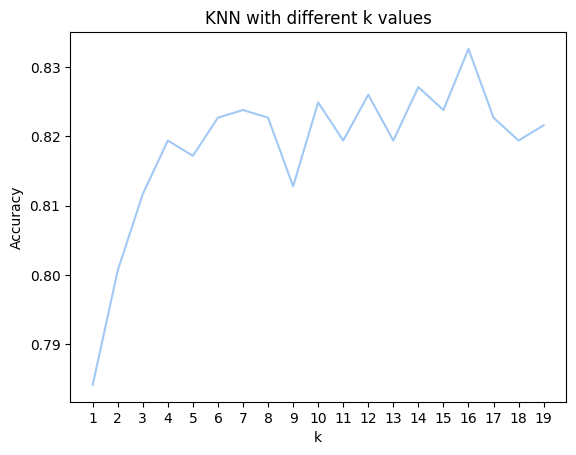

In [158]:
#Hyperparameter Tuning KNN
ks = []
performance = []
#Loop through
for k in range(1, 20):
    y_pred= train_and_predict_KNN(X_train, y_train, X_test, k)
    acc = accuracy_score(y_test, y_pred)
    ks.append(k)
    performance.append(acc)
#Plot the results
plt.plot(ks, performance)
plt.xticks(range(1, 20, 1))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN with different k values')

print(max(performance))

#This is a bit redundant but we will do it because the calculation needed is quite minimal. 
# Train and predict using the best k

best_k = ks[performance.index(max(performance))]
y_pred_knn_tuned = train_and_predict_KNN(X_train, y_train, X_test, best_k)

# Print the best k and its accuracy
print(f"Best k: {best_k}")
print(f"Accuracy with best k: {max(performance)}")


### 5.3. Logistic Regression

In [148]:
y_pred_lr_af = train_and_predict_LR(X_train, y_train, X_test)
acc_lr_after = accuracy_score(y_test, y_pred_lr_af)
print(acc_lr_after)
confusion_matrix(y_test, y_pred_lr_af)

0.8821585903083701


c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[548,  42],
       [ 65, 253]])

#### 5.3.1 Logistic Regression Hyperparameter Tuning

In [161]:
#Hyperparameter Tuning Logistic Regression
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['saga', 'liblinear', 'lbfgs']  # Solvers compatible with penalties
}

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=43)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best model
y_pred_lr_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9140360226659471
Confusion Matrix:
[[567  23]
 [ 55 263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       590
           1       0.92      0.83      0.87       318

    accuracy                           0.91       908
   macro avg       0.92      0.89      0.90       908
weighted avg       0.91      0.91      0.91       908



### 5.4. Decision Trees

In [149]:
y_pred_dt_af = train_and_predict_DTC(X_train, y_train, X_test)
acc_dt_after = accuracy_score(y_test, y_pred_dt_af)
print(acc_dt_after)
print(confusion_matrix(y_test, y_pred_dt_af))

0.8579295154185022
[[521  69]
 [ 60 258]]


#### 5.4. Decision Trees Hyperparameter Tuning

In [160]:
#Decission Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeClassifier(random_state=43) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_DT_Tuned = best_dtree_reg.predict(X_test)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



# print classification report 
print(classification_report(y_test, y_pred_DT_Tuned)) 
print(accuracy_score(y_test, y_pred_DT_Tuned))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       590
           1       0.85      0.80      0.82       318

    accuracy                           0.88       908
   macro avg       0.87      0.86      0.87       908
weighted avg       0.88      0.88      0.88       908

0.8810572687224669


### 5.5. Naive Bayes

In [150]:
y_pred_nb_af = train_and_predict_GNB(X_train, y_train, X_test)
acc_nb_after = accuracy_score(y_test, y_pred_nb_af)
print(acc_nb_after)
print(confusion_matrix(y_test, y_pred_nb_af))

0.8270925110132159
[[525  65]
 [ 92 226]]


## 6. Evaluation & Interpretation

### 6.1 Evaluation Metric for the Models

In [ ]:
print("KNN:", acc_knn_before, acc_knn_after)
print("svm",acc_svm_before, acc_svm_after)
print("logistic regression", acc_lr_before, acc_lr_after)
print("decission tree", acc_dt_before, acc_dt_after)
print('naive bayes', acc_nb_before, acc_nb_after)

KNN: 0.7533039647577092 0.8116740088105727
svm 0.6497797356828194 0.8281938325991189
logistic regression 0.8348017621145375 0.8821585903083701
decission tree 0.8370044052863436 0.8579295154185022
naive bayes 0.8348017621145375 0.8270925110132159


#### 6.1.1 SVM (After feature Engineering)

           Accuracy  Precision    Recall  F1 Score
Score SVM  0.828194   0.878505  0.591195  0.706767


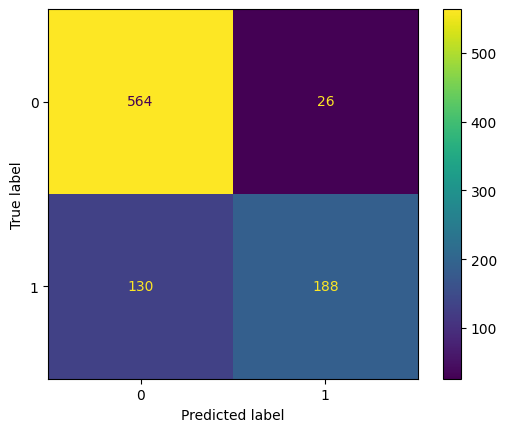

In [151]:
##table of different evaluation metrics
metrics_svm = {
    "Accuracy": accuracy_score(y_test,y_pred_svm_af),
    "Precision": precision_score(y_test, y_pred_svm_af),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1 Score": f1_score(y_test, y_pred_svm_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_svm = pd.DataFrame(metrics_svm, index=["Score SVM"])
print(metrics_df_svm)

#CONSUFION MATRIX 
cm_svm = confusion_matrix(y_test,y_pred_svm_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()


#### 6.1.2 KNN (After feature Engineering)

           Accuracy  Precision    Recall  F1 Score
Score KNN  0.811674   0.781609  0.641509  0.704663


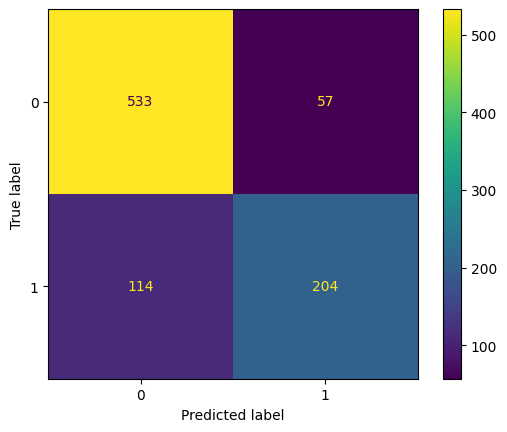

In [153]:
##table of different evaluation metrics
metrics_knn = {
    "Accuracy": accuracy_score(y_test,y_pred_knn_af),
    "Precision": precision_score(y_test, y_pred_knn_af),
    "Recall": recall_score(y_test, y_pred_knn_af),
    "F1 Score": f1_score(y_test, y_pred_knn_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_svm = pd.DataFrame(metrics_knn, index=["Score KNN"])
print(metrics_df_svm)

#CONSUFION MATRIX 
cm_knn = confusion_matrix(y_test,y_pred_knn_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

#### 6.1.3 Logistic Regression (After feature Engineering)

          Accuracy  Precision    Recall  F1 Score
Score LR  0.882159   0.857627  0.795597  0.825449


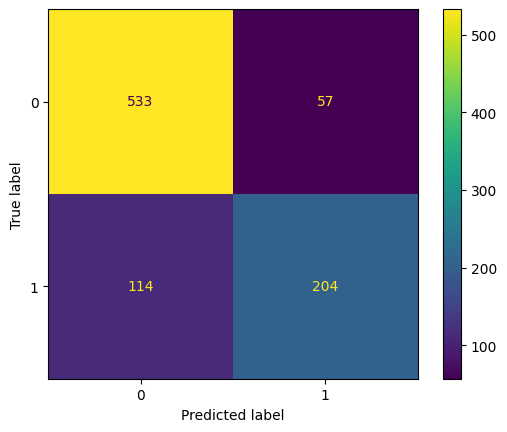

In [154]:
##table of different evaluation metrics
metrics_lr = {
    "Accuracy": accuracy_score(y_test,y_pred_lr_af),
    "Precision": precision_score(y_test, y_pred_lr_af),
    "Recall": recall_score(y_test, y_pred_lr_af),
    "F1 Score": f1_score(y_test, y_pred_lr_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_lr = pd.DataFrame(metrics_lr, index=["Score LR"])
print(metrics_df_lr)

#CONSUFION MATRIX 
cm_lr = confusion_matrix(y_test,y_pred_knn_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

#### 6.1.4 Decision Trees (After feature Engineering)


          Accuracy  Precision    Recall  F1 Score
Score DT  0.882159   0.857627  0.795597  0.825449


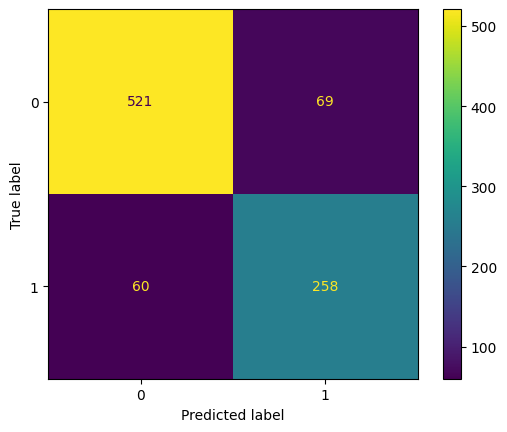

In [155]:
##table of different evaluation metrics
metrics_dt = {
    "Accuracy": accuracy_score(y_test,y_pred_dt_af),
    "Precision": precision_score(y_test, y_pred_dt_af),
    "Recall": recall_score(y_test, y_pred_dt_af),
    "F1 Score": f1_score(y_test, y_pred_dt_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_dt = pd.DataFrame(metrics_lr, index=["Score DT"])
print(metrics_df_dt)

#CONSUFION MATRIX 
cm_dt = confusion_matrix(y_test,y_pred_dt_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()

#### 6.1.5  Naive Bayes (After feature Engineering)

          Accuracy  Precision    Recall  F1 Score
Score NB  0.827093   0.776632  0.710692    0.7422


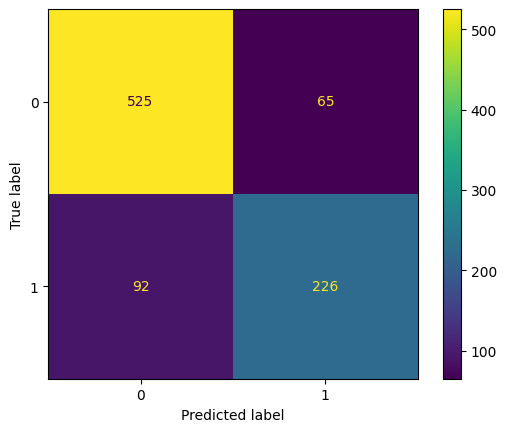

In [156]:
##table of different evaluation metrics
metrics_nb = {
    "Accuracy": accuracy_score(y_test,y_pred_nb_af),
    "Precision": precision_score(y_test, y_pred_nb_af),
    "Recall": recall_score(y_test, y_pred_nb_af),
    "F1 Score": f1_score(y_test, y_pred_nb_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_nb = pd.DataFrame(metrics_nb, index=["Score NB"])
print(metrics_df_nb)

#CONSUFION MATRIX 
cm_nb = confusion_matrix(y_test,y_pred_nb_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()

## 7. Conclusion